In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period_Boyd.dat
2022_Feb_week4_Linear_fit_period_This_work.dat
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out
51Pegb.ipynb
51Pegb.txt
51Pegb_example_fit.ipynb
DP_Leo_fit.ipynb
DP_Leo_fit_weighted_mean.ipynb


In [3]:
#Read data ---#1
Input = "2022_Feb_week4_Weighted_mean_calculation_This_work_combined.out"
Data   = np.genfromtxt(Input)

BMJD = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#t = T0_bjd + P0_day*Epoch
N = 2400000

x = BMJD
y = OC
dy = OC_err

len_x = len(x)
print(len_x)

34


In [5]:
K = 33.7        #m/s
P = 10220         #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025     #days

In [6]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [7]:
def solve_kepler(M,e):
    eanom = np.zeros(M.shape)
    for i,mi in enumerate(M):
        # do iterative root solve with e=0 giving E=M as guess
        tmp,=fsolve(lambda E: E-e*np.sin(E)-mi,mi)
        eanom[i] = tmp
    return eanom

In [8]:
def keplerian_fit(t,K,P,e,w,tau):
        e_anomaly = solve_kepler((t-tau)*2*np.pi/P,e)
        theta = 2*np.arctan2(np.sqrt(1.+e)*np.sin(0.5*e_anomaly),
                             np.sqrt(1.-e)*np.cos(0.5*e_anomaly))
        return K*(np.cos(theta+w)+e*np.cos(w))

In [9]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(keplerian_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess)

K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]

dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]


oc_fit = keplerian_fit(x,K,P,e,w,tau)
print(oc_fit)

if e<0:
    w -= np.pi
    e *= -1
    w_deg = w*180/np.pi
    print(K,P,e,w,w_deg,tau)


print("The parameters of egress part")
print("K =", K, "+/-", dK**0.5)
print("P =", P, "+/-", dP**0.5)
print("e =", e, "+/-", de**0.5)
print("w =", w, "+/-", dw**0.5)
print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi))
print("tau =", tau, "+/-", dtau**0.5)

[ -6.84836235  41.62254354  31.46229911   7.08678453  -4.42771105
   6.93081337  31.26490084 -34.02442977 -25.69753707 -12.46904221
 -13.85921939 -15.66831319 -17.33742    -24.1003545  -25.09608452
 -26.95702303 -28.23486859 -32.18805912 -21.83358426  -6.78646446
  32.3174283   36.84969181  36.84969181  48.58737286  15.74605568
 -35.71818612 -29.93307825 -19.8754845   12.35851783  39.39245246
  58.8551901   45.80348205  10.72825623 -18.60380413]
48.46196726126754 -4294.931430063285 0.27429474633114703 -0.4479540363142087 -25.665875696654172 47723.59210638666
The parameters of egress part
K = 48.46196726126754 +/- 1.0771044704483417
P = -4294.931430063285 +/- 10.10584115433267
e = 0.27429474633114703 +/- 0.01699965210602501
w = -0.4479540363142087 +/- 0.0546699275387392
w_deg = -25.665875696654176 +/- 3.1323561142557885
tau = 47723.59210638666 +/- 40.1086207784815


In [10]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
y_line = keplerian_fit(x_line, *params) #### For all interporation 
print(x_line)
print(x)

[44214.61562    44672.26631848 45129.91701697 45587.56771545
 46045.21841394 46502.86911242 46960.51981091 47418.17050939
 47875.82120788 48333.47190636 48791.12260485 49248.77330333
 49706.42400182 50164.0747003  50621.72539879 51079.37609727
 51537.02679576 51994.67749424 52452.32819273 52909.97889121
 53367.6295897  53825.28028818 54282.93098667 54740.58168515
 55198.23238364 55655.88308212 56113.53378061 56571.18447909
 57028.83517758 57486.48587606 57944.13657455 58401.78727303
 58859.43797152 59317.08867   ]
[44214.61562 44993.45298 45851.40631 46086.96681 48560.5578  48773.71401
 49143.77505 51870.83925 52284.71018 54919.76589 54941.30349 54970.67822
 54999.31317 55135.97098 55159.94602 55208.61678 55245.62567 55389.66308
 56712.00516 57100.74409 57748.32002 57811.3377  57811.3377  58561.25098
 58884.35291 56004.24921 56403.30917 56772.18547 57453.81143 57846.8222
 58187.51041 58593.24301 58934.11856 59317.08867]


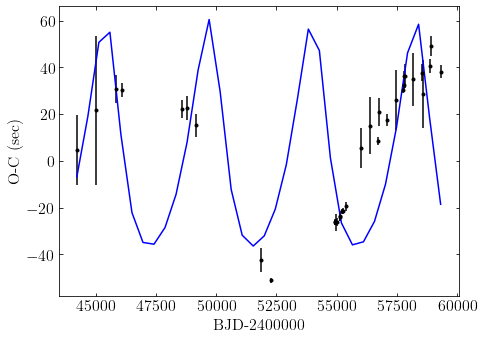

In [11]:
#print(phase)
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(7, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.errorbar(x,y,dy,fmt='.k')
plt.plot(x_line,y_line,'-b')
#plt.title('phased RV data for 51 Peg b')
plt.xlabel('BJD-'+str(N))
plt.ylabel('O-C (sec)')
plt.show()